# Filtro de Hodrick–Prescott (HP) — aprendizaje

## 1) Desagregación y objetivo
Tenemos $Y=[y_1,\dots,y_T]'$ y buscamos una tendencia suave $S=[s_1,\dots,s_T]'$ tal que
$$ y_t = s_t + c_t, \quad c_t = y_t - s_t. $$
HP define $S$ como la solución del compromiso ajuste–suavidad:
$$ \min_S\ \sum_{t=1}^T (y_t - s_t)^2 \; + \; \lambda \sum_{t=2}^{T-1} (s_{t+1} - 2 s_t + s_{t-1})^2. $$

## 2) Forma matricial
Sea $A\in\mathbb{R}^{(T-2)\times T}$ la matriz de segundas diferencias con filas $[\cdots,1,-2,1,\cdots]$.
Entonces
$$ S^{HP} = \arg\min_S\ (Y-S)'(Y-S) + \lambda (AS)'(AS) = (I + \lambda A'A)^{-1} Y, $$
y el ciclo es $$ C^{HP} = Y - S^{HP} = \big[I - (I+\lambda A'A)^{-1}\big]Y. $$

## 3) Elección de $\lambda$
Regla práctica: anual $\approx 100$, trimestral $\approx 1600$, mensual $\approx 14400$. Con muestras muy cortas, conviene reducir $\lambda$.

## 4) Implementación mínima con NumPy

In [ ]:
import numpy as np
def second_diff_matrix(T):
    A = np.zeros((max(0,T-2), T))
    for i in range(T-2): A[i,i:i+3] = [1,-2,1]
    return A

def hp_filter(y, lam):
    y = np.asarray(y, float).reshape(-1)
    T = y.size
    A = second_diff_matrix(T)
    M = np.eye(T) + lam * (A.T @ A)
    S = np.linalg.solve(M, y)
    return S, y - S

lam = 14400.0
S, C = hp_filter(np.array([112.0, 118.0, 132.0, 129.0, 121.0, 135.0, 148.0, 148.0, 136.0]), lam)
print('lambda =', lam, '  SSE_cycle =', float(np.sum(C**2)))

## 5) Gráficas (PNG)

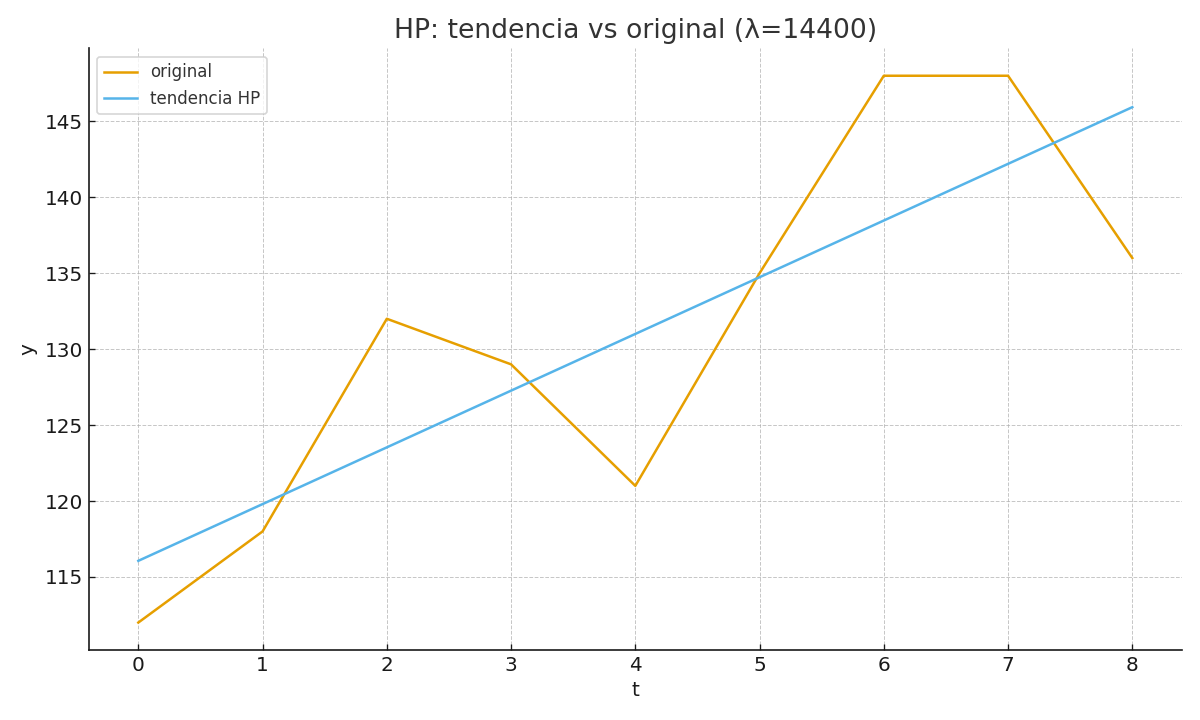

In [1]:
import matplotlib.pyplot as plt, numpy as np
t = np.arange(len(S))
plt.figure(); plt.plot(t, [112.0, 118.0, 132.0, 129.0, 121.0, 135.0, 148.0, 148.0, 136.0], label='original'); plt.plot(t, S, label='tendencia HP')
plt.xlabel('t'); plt.ylabel('y'); plt.title('HP: tendencia vs original'); plt.legend(); plt.tight_layout(); plt.show()

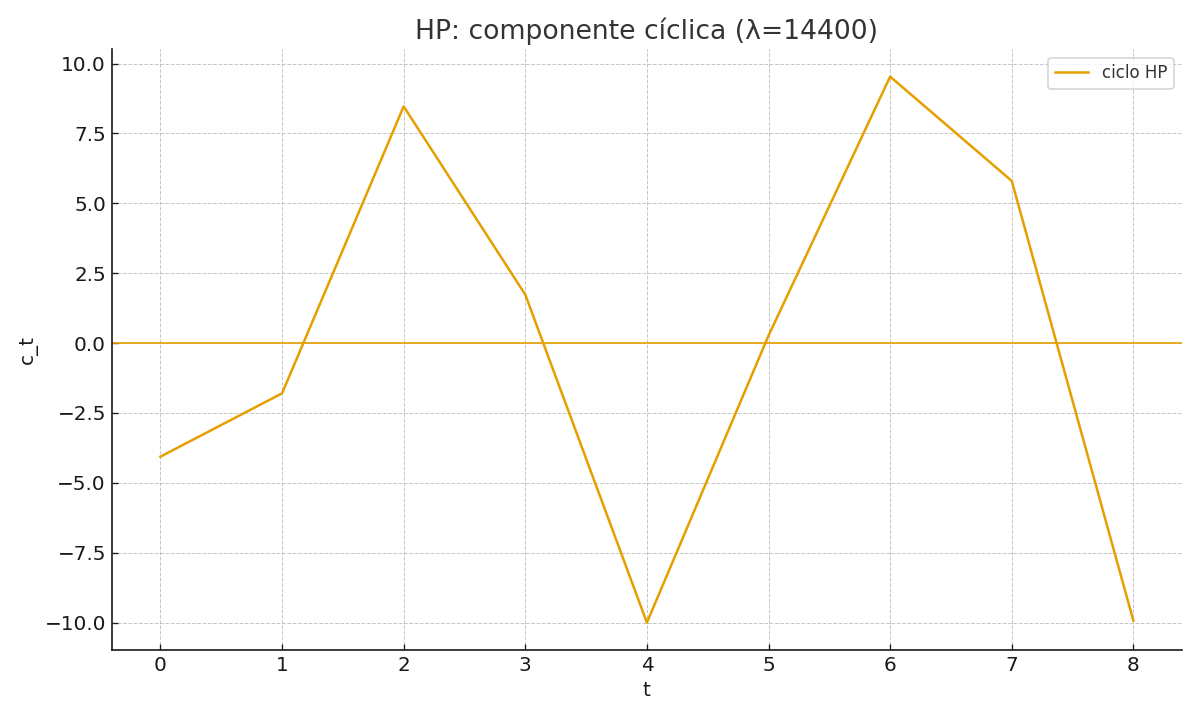

In [2]:
import matplotlib.pyplot as plt, numpy as np
plt.figure(); plt.plot(t, C, label='ciclo HP'); plt.axhline(0, lw=1)
plt.xlabel('t'); plt.ylabel('c_t'); plt.title('HP: ciclo'); plt.legend(); plt.tight_layout(); plt.show()

### Notas
- Resolución exacta vía sistema lineal simétrico definido positivo.
- Complejidad $\mathcal{O}(T)$ si se explota la estructura banda; aquí usamos la ruta densa para claridad.